In [72]:
import pandas as pd ##imports pandas as pd
import numpy as np ##imports numpy as np

import matplotlib.pyplot as plt ##imports matplotlib.pyplot as plt
import seaborn as sns ##imports seaborn as sns

import csv ##imports csv

import sklearn ##imports sklearn

In [73]:
df = pd.read_csv('household_energy_consumption.csv') ##reads the csv file and stores it in a dataframe called df

In [74]:
display(df) ##displays the dataframe


,Household_ID,Date,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh
0,H00001,2025-04-01,8.4,4,17.8,No,3.2
1,H00001,2025-04-02,7.9,4,17.3,No,2.8
2,H00001,2025-04-03,9.2,4,18.6,No,3.0
3,H00001,2025-04-04,7.9,4,18.2,No,2.7
4,H00001,2025-04-05,9.6,4,11.9,No,3.2
...,...,...,...,...,...,...,...
89995,H12857,2025-04-04,5.0,2,19.3,No,1.5
89996,H12857,2025-04-05,5.3,2,16.1,No,1.7
89997,H12857,2025-04-06,4.3,2,14.6,No,1.5
89998,H12857,2025-04-07,7.2,2,18.2,No,2.6


In [75]:
df.info() ##displays the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Household_ID            90000 non-null  object 
 1   Date                    90000 non-null  object 
 2   Energy_Consumption_kWh  90000 non-null  float64
 3   Household_Size          90000 non-null  int64  
 4   Avg_Temperature_C       90000 non-null  float64
 5   Has_AC                  90000 non-null  object 
 6   Peak_Hours_Usage_kWh    90000 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.8+ MB


In [76]:
df['Date'] = pd.to_datetime(df['Date']) ##converts the 'Date' column to datetime format

In [77]:
df.isnull().sum() ##checks for null values in the dataframe

Household_ID              0
Date                      0
Energy_Consumption_kWh    0
Household_Size            0
Avg_Temperature_C         0
Has_AC                    0
Peak_Hours_Usage_kWh      0
dtype: int64

In [78]:
df.columns ##displays the columns in the dataframe

Index(['Household_ID', 'Date', 'Energy_Consumption_kWh', 'Household_Size',
       'Avg_Temperature_C', 'Has_AC', 'Peak_Hours_Usage_kWh'],
      dtype='object')

In [79]:
df = df.rename(columns={'Household_ID': 'Household ID' , 'Energy_Consumption_kWh': 'Energy Consumption KWH',
                        'Household_Size': 'Household Size', 'Avg_Temperature_C': 'Avg Temperature C',
                        'Has_AC': 'Has AC', 'Peak_Hours_Usage_kWh': 'Peak Hours Usage KWH'}) ##renames the columns in the dataframe

    

In [80]:
display(df) ##displays the dataframe with the new column names

,Household ID,Date,Energy Consumption KWH,Household Size,Avg Temperature C,Has AC,Peak Hours Usage KWH
0,H00001,2025-04-01,8.4,4,17.8,No,3.2
1,H00001,2025-04-02,7.9,4,17.3,No,2.8
2,H00001,2025-04-03,9.2,4,18.6,No,3.0
3,H00001,2025-04-04,7.9,4,18.2,No,2.7
4,H00001,2025-04-05,9.6,4,11.9,No,3.2
...,...,...,...,...,...,...,...
89995,H12857,2025-04-04,5.0,2,19.3,No,1.5
89996,H12857,2025-04-05,5.3,2,16.1,No,1.7
89997,H12857,2025-04-06,4.3,2,14.6,No,1.5
89998,H12857,2025-04-07,7.2,2,18.2,No,2.6


In [81]:
df.drop(columns=['Household ID'], inplace=True) ##drops the 'Household ID' column from the dataframe

In [82]:
display(df) ##displays the dataframe with the new column names

,Date,Energy Consumption KWH,Household Size,Avg Temperature C,Has AC,Peak Hours Usage KWH
0,2025-04-01,8.4,4,17.8,No,3.2
1,2025-04-02,7.9,4,17.3,No,2.8
2,2025-04-03,9.2,4,18.6,No,3.0
3,2025-04-04,7.9,4,18.2,No,2.7
4,2025-04-05,9.6,4,11.9,No,3.2
...,...,...,...,...,...,...
89995,2025-04-04,5.0,2,19.3,No,1.5
89996,2025-04-05,5.3,2,16.1,No,1.7
89997,2025-04-06,4.3,2,14.6,No,1.5
89998,2025-04-07,7.2,2,18.2,No,2.6


In [83]:
df = pd.get_dummies(df, columns=['Has AC'], drop_first=True) ##converts the 'Has AC' column to dummy variables and drops the first column

In [84]:
display(df) ##displays the dataframe with the new column names

,Date,Energy Consumption KWH,Household Size,Avg Temperature C,Peak Hours Usage KWH,Has AC_Yes
0,2025-04-01,8.4,4,17.8,3.2,False
1,2025-04-02,7.9,4,17.3,2.8,False
2,2025-04-03,9.2,4,18.6,3.0,False
3,2025-04-04,7.9,4,18.2,2.7,False
4,2025-04-05,9.6,4,11.9,3.2,False
...,...,...,...,...,...,...
89995,2025-04-04,5.0,2,19.3,1.5,False
89996,2025-04-05,5.3,2,16.1,1.7,False
89997,2025-04-06,4.3,2,14.6,1.5,False
89998,2025-04-07,7.2,2,18.2,2.6,False


In [85]:
df['Date'].value_counts() ##counts the number of occurrences of each date in the 'Date' column

Date
2025-04-01    12857
2025-04-02    12857
2025-04-03    12857
2025-04-04    12857
2025-04-05    12857
2025-04-06    12857
2025-04-07    12857
2025-04-08        1
Name: count, dtype: int64

In [86]:
df.columns ##displays the columns in the dataframe

Index(['Date', 'Energy Consumption KWH', 'Household Size', 'Avg Temperature C',
       'Peak Hours Usage KWH', 'Has AC_Yes'],
      dtype='object')

In [87]:
print('The statistics on the Energy Consumption KWh column are as follows ' + str(df['Energy Consumption KWH'].describe())) ##describes the 'Energy Consumption KWH' column

The statistics on the Energy Consumption KWh column are as follows count    90000.000000
mean        10.571988
std          5.519494
min          0.500000
25%          6.000000
50%         10.400000
75%         14.800000
max         20.000000
Name: Energy Consumption KWH, dtype: float64


<Axes: >

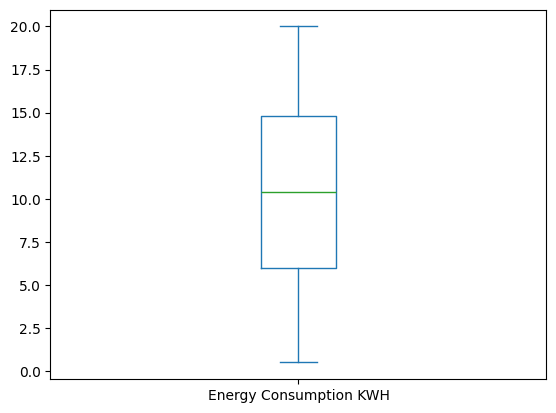

In [88]:
df["Energy Consumption KWH"].plot(kind='box') ##plots a boxplot of the 'Energy Consumption KWH' column

Text(0.5, 0, 'Energy Consumption KWH')

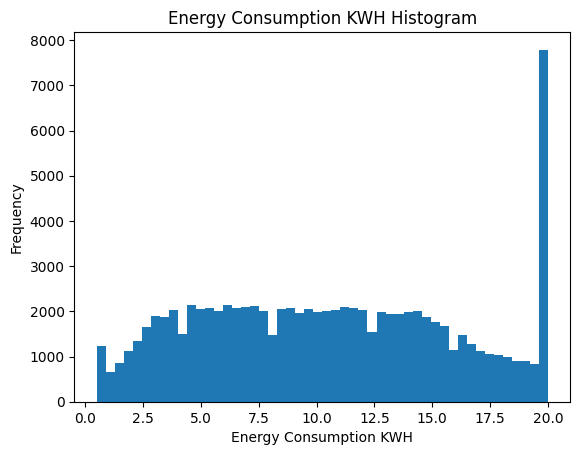

In [89]:
df['Energy Consumption KWH'].plot(kind='hist', bins=50) ##plots a histogram of the 'Energy Consumption KWH' column with 50 bins
plt.title('Energy Consumption KWH Histogram') ##sets the title of the histogram
plt.xlabel('Energy Consumption KWH') ##sets the x-axis label of the histogram	

In [90]:
df.columns ##displays the columns in the dataframe

Index(['Date', 'Energy Consumption KWH', 'Household Size', 'Avg Temperature C',
       'Peak Hours Usage KWH', 'Has AC_Yes'],
      dtype='object')

In [91]:
df['Household Size'].describe() ##describes the 'Household Size' column

count    90000.000000
mean         3.487811
std          1.709761
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: Household Size, dtype: float64

Text(0.5, 0, 'Household Size')

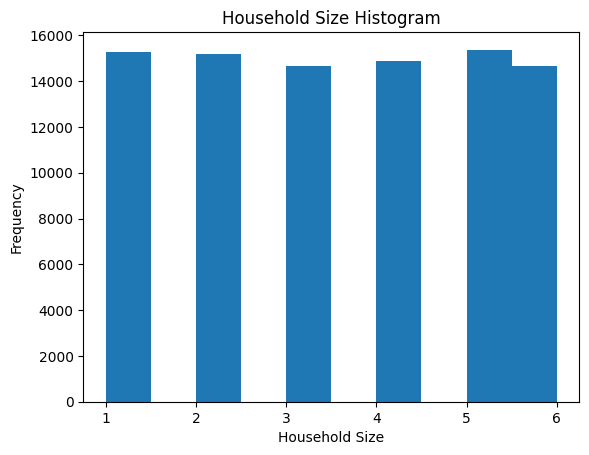

In [92]:
df['Household Size'].plot(kind='hist' ) ##plots a histogram of the 'Household Size' column with 50 bins
plt.title('Household Size Histogram') ##sets the title of the histogram
plt.xlabel('Household Size') ##sets the x-axis label of the histogram

In [93]:
df['Avg Temperature C'].describe() ##describes the 'Avg Temperature C' column


count    90000.000000
mean        17.505802
std          2.491621
min         10.000000
25%         15.800000
50%         17.500000
75%         19.200000
max         25.000000
Name: Avg Temperature C, dtype: float64

Text(0.5, 0, 'Avg Temperature C')

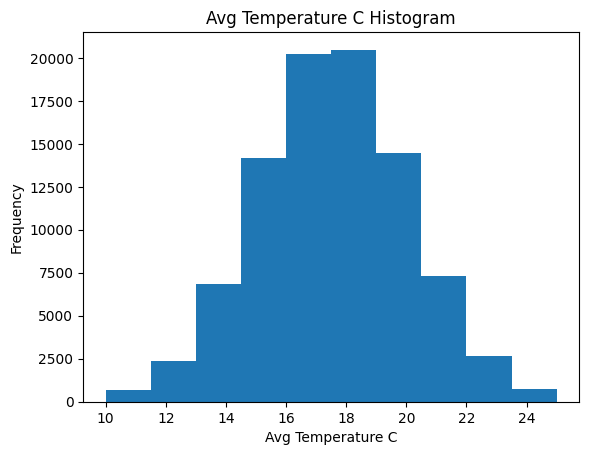

In [94]:
df['Avg Temperature C'].plot(kind='hist') ##plots a histogram of the 'Avg Temperature C' column with 50 bins
plt.title('Avg Temperature C Histogram') ##sets the title of the histogram
plt.xlabel('Avg Temperature C') ##sets the x-axis label of the histogram	

In [95]:
df.columns ##displays the columns in the dataframe

Index(['Date', 'Energy Consumption KWH', 'Household Size', 'Avg Temperature C',
       'Peak Hours Usage KWH', 'Has AC_Yes'],
      dtype='object')

In [96]:
df['Peak Hours Usage KWH'].describe() ##describes the 'Peak Hours Usage KWH' column

count    90000.000000
mean         4.319557
std          2.531432
min          0.200000
25%          2.300000
50%          4.000000
75%          6.000000
max         10.000000
Name: Peak Hours Usage KWH, dtype: float64

Text(0.5, 0, 'Peak Hours Usage KWH')

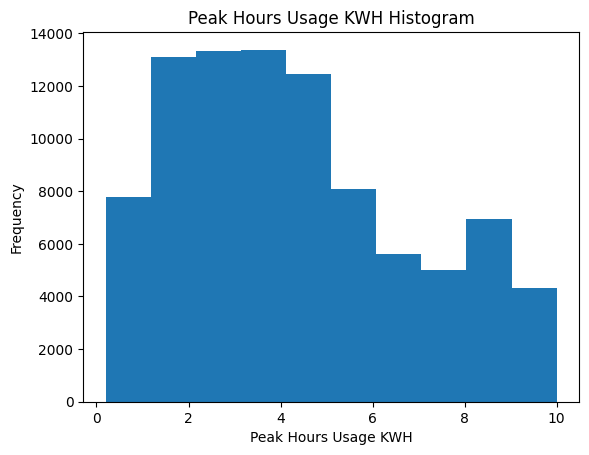

In [97]:
df['Peak Hours Usage KWH'].plot(kind='hist') ##plots a histogram of the 'Peak Hours Usage KWH' column with 50 bins
plt.title('Peak Hours Usage KWH Histogram') ##sets the title of the histogram
plt.xlabel('Peak Hours Usage KWH') ##sets the x-axis label of the histogram


<Axes: xlabel='Has AC_Yes'>

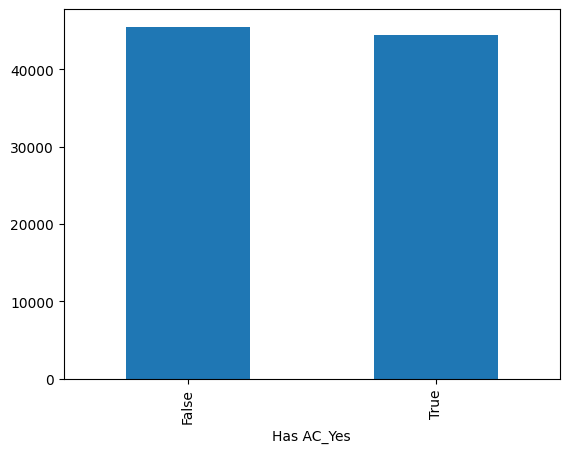

In [98]:
df['Has AC_Yes'].value_counts().plot(kind='bar') ##describes the 'Has AC_Yes' column

In [99]:
print('The statistics on the Has AC_Yes column are as follows ' + str(df['Has AC_Yes'].value_counts())) ##describes the 'Has AC_Yes' column

The statistics on the Has AC_Yes column are as follows Has AC_Yes
False    45508
True     44492
Name: count, dtype: int64


Text(0.5, 1.0, 'Correlation Matrix')

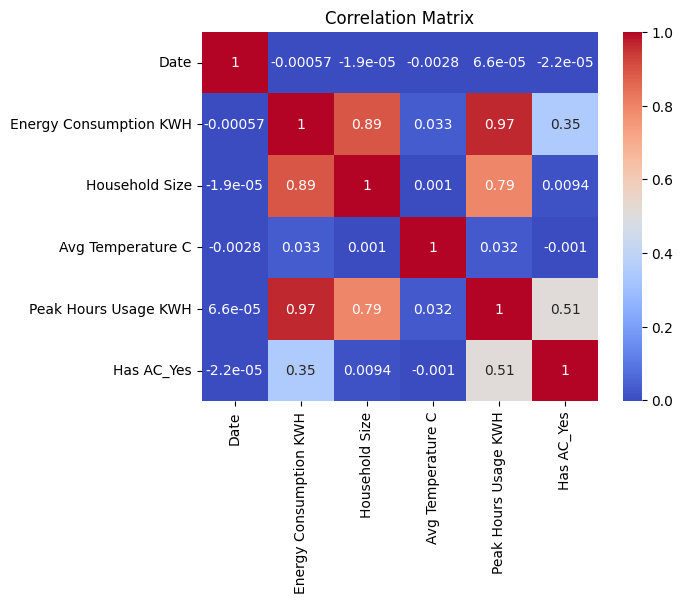

In [110]:
corr_matrix = df.corr() ##calculates the correlation matrix of the dataframe
matrix = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') ##plots a heatmap of the correlation matrix
plt.title('Correlation Matrix') ##sets the title of the heatmap


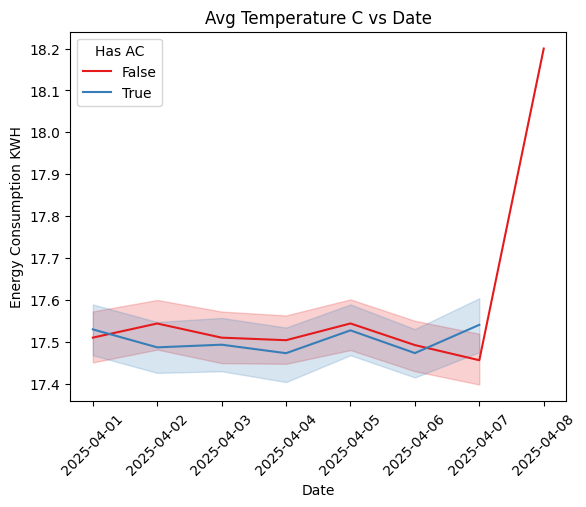

In [130]:
sns.lineplot(data=df, x='Date', y='Avg Temperature C', hue='Has AC_Yes', palette='Set1') ##plots a lineplot of the 'Energy Consumption KWH' column against the 'Date' column with the 'Has AC_Yes' column as the hue
plt.title('Avg Temperature C vs Date') ##sets the title of the lineplot
plt.xlabel('Date') ##sets the x-axis label of the lineplot
plt.ylabel('Energy Consumption KWH') ##sets the y-axis label of the lineplot
plt.xticks(rotation=45) ##rotates the x-axis labels by 45 degrees
plt.legend(title='Has AC') ##sets the legend title of the lineplot


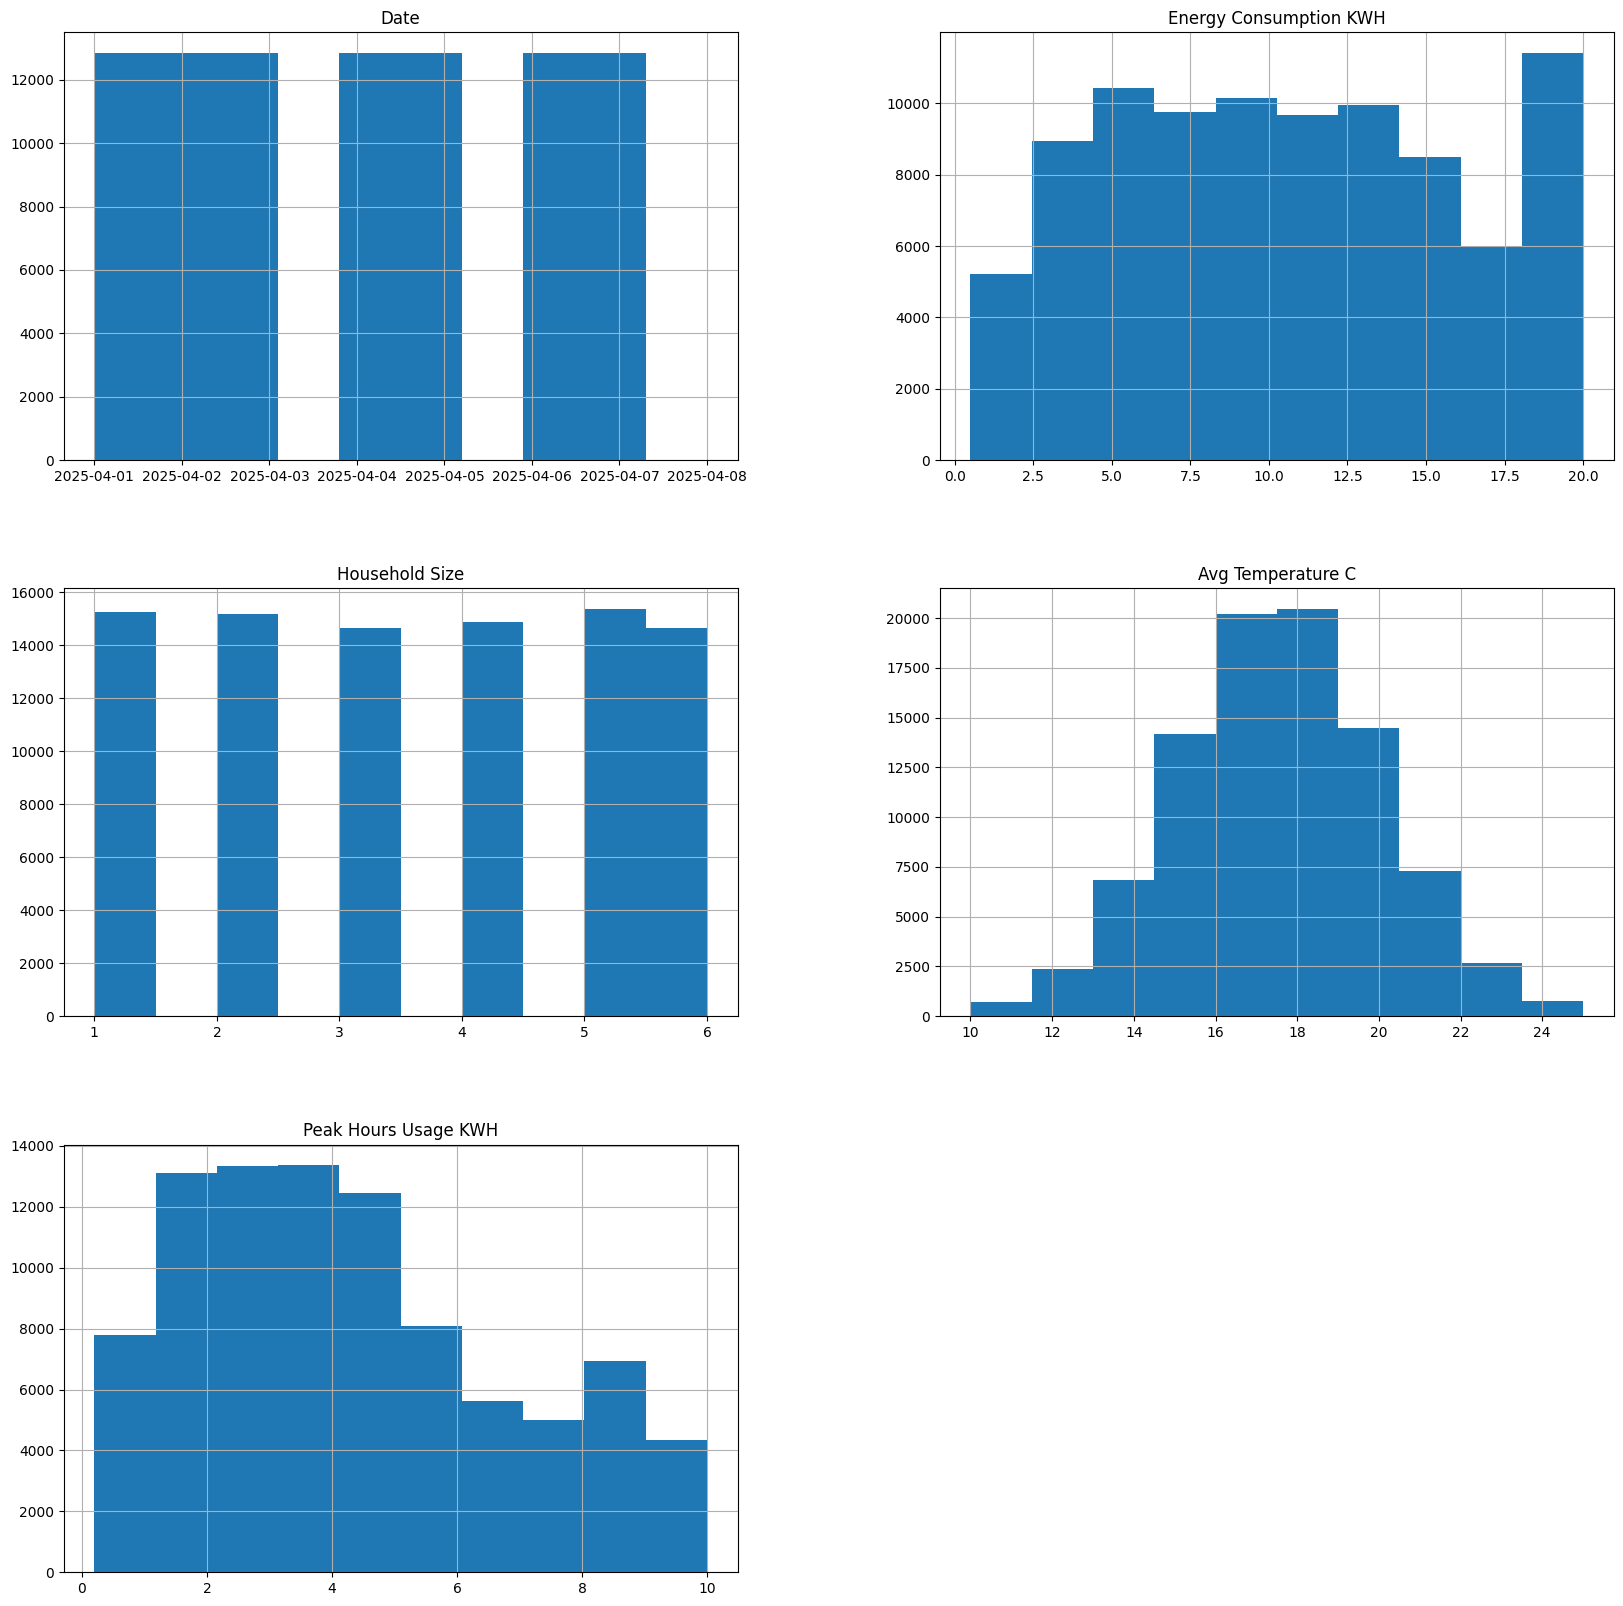

In [135]:
df.hist(figsize=(20, 20)) ##plots a histogram of the dataframe with a figure size of 20x20
plt.show() ##displays the histogram

In [101]:
##Initial finding suggest there is some correlations within the dataset. Correlations seen are Household Size : Energy Consumption KWh .89,
                                                                                             ##Peak Hours Usage : Energy Consumption KWh .97,
																																														 ##Has AC_Yes : Energy Consumtption KWh .35,
																																														 ##Has AC_Yes : Peak Hours Usage KWh .51,

In [102]:
df.columns

Index(['Date', 'Energy Consumption KWH', 'Household Size', 'Avg Temperature C',
       'Peak Hours Usage KWH', 'Has AC_Yes'],
      dtype='object')

In [103]:
correlation1 = df[['Energy Consumption KWH', 'Household Size']] ##calculates the correlation between 'Energy Consumption KWH' and 'Household Size'
correlation2 = df[['Peak Hours Usage KWH','Energy Consumption KWH']] ##calculates the correlation between 'Peak Hours Usage KWH' and 'Energy Consumption KWH'
correlation3 = df[['Has AC_Yes', 'Energy Consumption KWH']] ##calculates the correlation between 'Has AC_Yes' and 'Energy Consumption KWH'
correlation4 = df[['Peak Hours Usage KWH', 'Household Size']] ##calculates the correlation between 'Peak Hours Usage KWH' and 'Avg Temperature C'
correlation5 = df[['Has AC_Yes','Peak Hours Usage KWH']] ##calculates the correlation between 'Has AC_Yes' and 'Peak Hours Usage KWH'

Text(0, 0.5, 'Household Size')

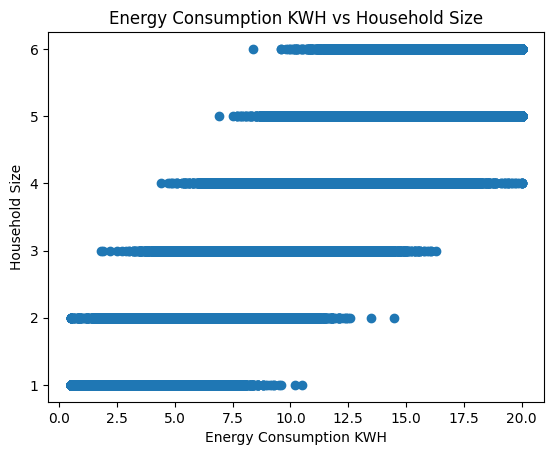

In [104]:
plt.scatter(correlation1['Energy Consumption KWH'], correlation1['Household Size']) ##plots a scatter plot of the correlation between 'Energy Consumption KWH' and 'Household Size'
plt.title('Energy Consumption KWH vs Household Size') ##sets the title of the scatter plot
plt.xlabel('Energy Consumption KWH') ##sets the x-axis label of the scatter plot
plt.ylabel('Household Size') ##sets the y-axis label of the scatter plot


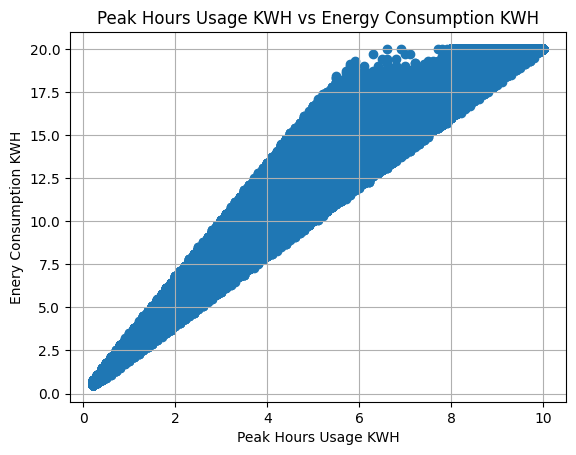

In [105]:
plt.scatter(correlation2['Peak Hours Usage KWH'], correlation2['Energy Consumption KWH']) ##plots a scatter plot of the correlation between 'Peak Hours Usage KWH' and 'Energy Consumption KWH'	
plt.title('Peak Hours Usage KWH vs Energy Consumption KWH') ##sets the title of the scatter plot
plt.xlabel('Peak Hours Usage KWH') ##sets the x-axis label of the scatter plot
plt.ylabel('Enery Consumption KWH') ##sets the y-axis label of the scatterplot
plt.grid() ##creates a grid on the scatter plot

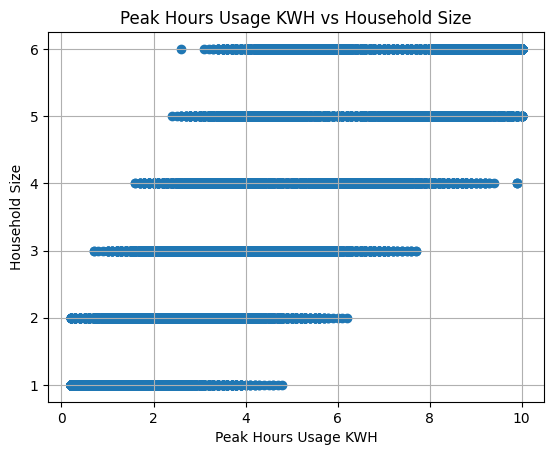

In [106]:
plt.scatter(correlation4['Peak Hours Usage KWH'], correlation4['Household Size']) ##plots a scatter plot of the correlation between 'Peak Hours Usage KWH' and 'Avg Temperature C'
plt.title('Peak Hours Usage KWH vs Household Size') ##sets the title of the scatter plot
plt.xlabel('Peak Hours Usage KWH') ##sets the x-axis label of the scatter plot
plt.ylabel('Household Size') ##sets the y-axis label of the scatter plot
plt.grid() ##creates a grid on the scatter plot

In [116]:
from sklearn.model_selection import train_test_split ##imports the train_test_split function from sklearn.model_selection
from sklearn.model_selection import cross_val_score ##imports the cross_val_score function from sklearn.model_selection
from sklearn.ensemble import RandomForestRegressor ##imports the RandomForestRegressor function from sklearn.ensemble
from sklearn.metrics import f1_score, mean_squared_error ##imports the f1_score function from sklearn.metrics


In [117]:
df.columns ##displays the columns in the dataframe


Index(['Date', 'Energy Consumption KWH', 'Household Size', 'Avg Temperature C',
       'Peak Hours Usage KWH', 'Has AC_Yes'],
      dtype='object')

In [118]:
x =df[['Household Size', 'Avg Temperature C', ##creates a dataframe with the independent variables
       'Peak Hours Usage KWH', 'Has AC_Yes']]

y = df['Energy Consumption KWH'] ##creates a dataframe with the dependent variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) ##splits the dataframe into training and testing sets with a test size of 20% and a random state of 42

In [119]:
regressor  = RandomForestRegressor(n_estimators=100, random_state=42) ##creates a random forest regressor with 100 estimators and a random state of 42
regressor.fit(x_train, y_train) ##fits the random forest regressor to the training data
y_pred = regressor.predict(x_test) ##predicts the values of the testing data
print('The R^2 score of the model is ' + str(regressor.score(x_test, y_test))) ##prints the R^2 score of the model


The R^2 score of the model is 0.982991509590449


In [123]:
print('The mean squared error of the model is ' + str(mean_squared_error(y_test, y_pred))) ##prints the mean squared error of the model
print('The root mean squared error of the model is ' + str(np.sqrt(mean_squared_error(y_test, y_pred)))) ##prints the root mean squared error of the model


The mean squared error of the model is 0.5179786949591932
The root mean squared error of the model is 0.7197073675871279
